# A4-Q1: `MySpline`

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## `MySpline`

In [ ]:
def MySpline(x, y):
    '''
     S = MySpline(x, y)

     Input:
       x and y are arrays (or lists) of corresponding x- and y-values,
       specifying the points in the x-y plane.  The x-values
       must be in increasing order.

     Output:
       S is a function that takes x or an array (or list) of x-values
         It evaluates the cubic spline and returns the interpolated value.

     Implementation:
       Note that there is one more "a" than "b" or "c". I would suggest
       the following mapping:
       
         a[0] = a_0          b[0] = b_1        c[0] = c_1
         a[1] = a_1          b[1] = b_2        c[1] = c_2
              :                   :                 :
         a[n-2] = a_(n-2)    b[n-2] = b_(n-1)  c[n-2] = c_(n-1)
         a[n-1] = a_(n-1)
         
       The polynomial piece is evaluated at xx using
       
         p_i(xx) = a[i]*(x[i+1]-xx)**3/(6*hi) + a[i+1]*(xx-x[i])**3/(6*hi) +
                   b[i]*(x[i+1]-xx) + c[i]*(xx-x[i])

       where hk = x[k+1] - x[k] for k = 0, ... , n-1
    '''
    n = len(x)
    h = np.zeros(n - 1)
    a = np.zeros(n)
    b = np.zeros(n-1)
    c = np.zeros(n-1)
    
    M = np.zeros((n,n))
    r = np.zeros(n)
    
    # === YOUR CODE HERE ===
    # a[0 - n-1]
    # b[0 - n-2]
    # c[0 - n-2]
    for i in range(0, n-1):
        h[i] = x[i + 1] - x[i]
    
    for row in range(0, n):
        for col in range(0, n):
            if row == col == 0:
                M[0, 0] = h[0] / 3
            elif row == col == n - 1:
                M[n - 1, n - 1] = h[n - 2] / 3
            elif row == col + 1:
                M[row, col] = h[col] / 6
            elif col == row + 1:
                M[row, col] = h[row] / 6
            elif row == col:
                M[row, col] = (h[row] + h[row - 1]) / 3
           
    for k in range(0, n):
        delta = y[k] - y[k - 1]
        delta_two = 0
        if k == 0:
            r[0] = delta / h[0]
        elif k == n - 1:
            r[n - 1] = delta / h[n - 2]
        else:
            delta_two = y[k + 1] - y[k]
            r[k] = delta_two / h[k] - delta / h[k - 1]
    
    r = np.array(r[1:-1])
    M = np.delete(M,0,0)
    M = np.delete(M,0,1)
    M = np.delete(M,-1,0)
    M = np.delete(M,-1,1)

    # boundary condition: 0
    a[0] = 0
    a[1:-1] = np.array(np.linalg.solve(M,r))
    a[-1] = 0
    
    # getting value B and C after A
    for k in range(1, n):
        b[k - 1] = (y[k - 1] / h[k - 1] - a[k - 1] * h[k - 1] / 6)
        
    for k in range(1, n):
        c[k - 1] = (y[k] / h[k - 1] - a[k] * h[k - 1] / 6)
    
        
    #======================================
    #
    # This is the function that gets returned.
    # It evaluates the cubic spline at xvals.
    #
    def spline(xvals, x=x, a=a, b=b, c=c):
        '''
         S = spline(xvals)

         Evaluates the cubic spline at xvals.

         Inputs:
          xvals can be list-like, or a scalar (**must be in ascending order**)

         Output:
          S is a list of values with the same number of elements as x
        '''
        # Turn non-list-like input into list-like
        if type(xvals) not in (list, np.ndarray,):
            xvals = [xvals]

        S = []  # The return list of values

        # 
        k = 0   # this is the current polynomial piece
        hk = x[k+1] - x[k]

        for xx in xvals:

            # If the next x-value is not on the current piece...
            while xx>x[k+1]:
                # ... Go to next piece
                k += 1
                hk = x[k+1] - x[k]

            S_of_x = a[k]*(x[k+1]-xx)**3/(6*hk) + a[k+1]*(xx-x[k])**3/(6*hk) + b[k]*(x[k+1]-xx) + c[k]*(xx-x[k])

            S.append(S_of_x)

        return S
    #======================================
    
    return spline

## Test `MySpline`

In [ ]:
# Simple data points to interpolate
y = [1, 3, 4, 2, -1, 1]
t = [0, 1, 2, 3,  4, 5]
t1 = np.arange(0,5,0.001)


In [ ]:
# Call the function
sp = MySpline(t,y)

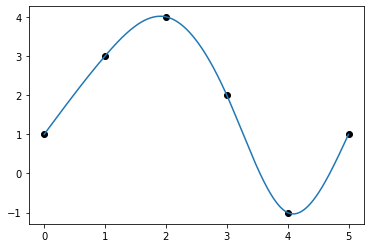

In [ ]:
# Plot the spline and the interpolation points
plt.plot(t,y,'ko')

y = sp(t1)

plt.plot(t1,y)
